In [1]:
import numpy as np
import matplotlib.pyplot as plt

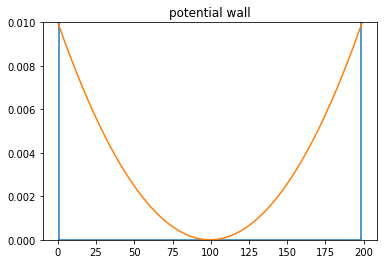

In [1]:
# make some potential
def infinite_wall(bins):
    V = np.zeros([bins])
    V[0] = 100000; V[-1] = 100000;
    return V

def parabola_wall(bins):
    x = np.linspace(-0.1, 0.1, bins)
    return x**2

# show the potential
V1 = infinite_wall(200)
V2 = parabola_wall(200)
plt.plot(V1)
plt.plot(V2)
plt.title('potential wall')
plt.ylim([0, 0.01])
plt.show()

In [1]:
# Use Numerov method to solve schrodinger's equation
def numerov_schro(bins, V, C=1, xr=[0, 1], n=4):
    # C = h^2/(2m)
    x = np.linspace(xr[0], xr[1], bins)
    dx = x[1] - x[0]
    # make second derivative bins x bins matrix
    # make potential matrix
    pot = np.diag(V)
    temp = np.ones([bins])
    temp = np.diag(-2 * temp)
    for i in range(bins-1):
        temp[i, i+1] = 1
        temp[i+1, i] = 1
    sdmat = -C/dx**2 * temp
    A = sdmat + pot
    # solve eigenvalue problem
    [ee, ev] = np.linalg.eig(A)
    [EE, EV] = arange_eig(ee, ev, n)
    return x, EE, EV

def arange_eig(ee, ev, n):
    # return up to k in small order
    ee = list(ee); ev = list(ev.transpose())
    value = list(); vector = list()
    for sm in range(n):
        emin = 10e8
        for i, val in enumerate(ee):
            if (emin > val):
                emin = val
                index = i
            elif val < 0:
                continue
        value.append(emin)
        vector.append(ev[index])
        ee.pop(index)
        ev.pop(index)
    return np.array(value), np.array(vector)

def print_eigvalue(ee):
    for i, energy in enumerate(ee):
        print('state%d energy: %8.2f'%(i+1, energy))

def subplot_eigvector(ev, V):
    n = len(ev)
    k = n//4 # nx4 subplots
    if n%4 != 0:
        k = k + 1
    fig, axes = plt.subplots(k, 4)
    fig.set_size_inches(24, 6*k)
    for i, psi in enumerate(ev):
        wave = psi**2
        pmax = max(wave); tol = pmax/10
        if k == 1:
            axes[i].plot(x, wave, color='b')
            axes[i].plot(x, V, color='r')
            axes[i].set_title('state%d'%(i+1))
            axes[i].set_ylim([-tol, pmax+tol])
        else:
            axes[i//4, i%4].plot(x, wave, color='b')
            axes[i//4, i%4].plot(x, V, color='r')
            axes[i//4, i%4].set_title('state%d'%(i+1))
            axes[i//4, i%4].set_ylim([-tol, pmax+tol])
    plt.show()
        

In [1]:
bins = 200
V = infinite_wall(bins)
[x, ee, ev] = numerov_schro(bins, V, n=4)

In [1]:
print_eigvalue(ee)

state1 energy:     9.81
state2 energy:    39.25
state3 energy:    88.31
state4 energy:   156.97


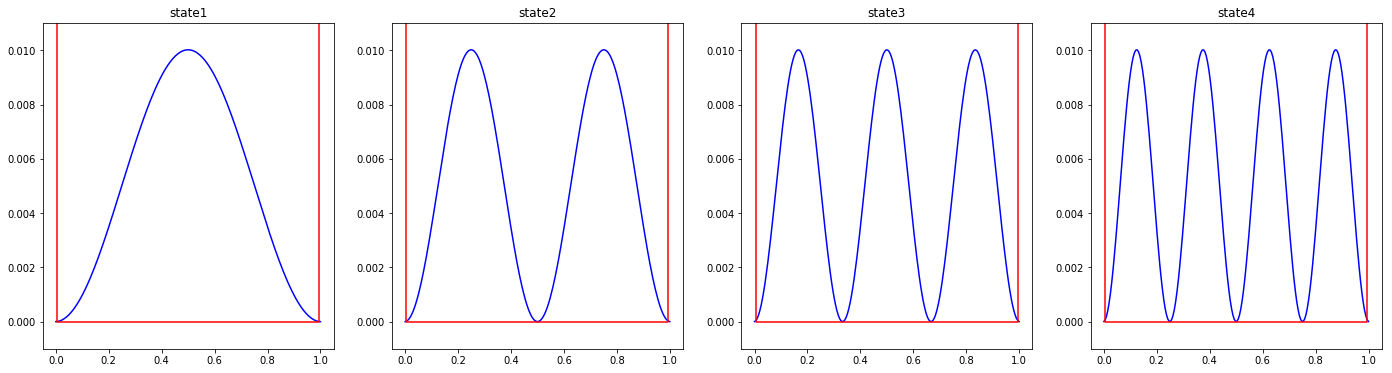

In [1]:
subplot_eigvector(ev, V)